In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats


In [3]:
college_df = pd.read_csv("../Resources/diversity_changes.csv")
census_df = pd.read_csv("../Resources/cleaned_census_data2011-2014-2018.csv")

In [4]:
# Found at http://code.activestate.com/recipes/577305-python-dictionary-of-us-states-and-territories/
# Author unknown

states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [5]:
college_df['Name'] = college_df["STABBR"].map(states)
college_df

,STABBR,UGDS_WHITE_2011,UGDS_BLACK_2011,UGDS_HISP_2011,UGDS_ASIAN_2011,UGDS_AIAN_2011,UGDS_WHITE_2014,UGDS_BLACK_2014,UGDS_HISP_2014,UGDS_ASIAN_2014,...,HISP_change_14_18,HISP_change_11_18,HISP_change_11_14,ASIAN_change_14_18,ASIAN_change_11_18,ASIAN_change_11_14,AIAN_change_14_18,AIAN_change_11_18,AIAN_change_11_14,Name
0,AK,0.536333,0.023567,0.055167,0.033733,0.112400,0.491800,0.022900,0.063533,0.042033,...,0.021100,0.029467,0.008367,0.001667,0.009967,8.300000e-03,0.004800,-0.008733,-0.013533,Alaska
1,AL,0.444667,0.456667,0.017833,0.026967,0.006467,0.441433,0.440267,0.024000,0.030433,...,0.007667,0.013833,0.006167,0.003967,0.007433,3.466667e-03,-0.001267,-0.001433,-0.000167,Alabama
2,AR,0.741633,0.138100,0.040233,0.017567,0.008833,0.682167,0.150833,0.061833,0.025233,...,0.008033,0.029633,0.021600,-0.003067,0.004600,7.666667e-03,-0.001133,-0.003533,-0.002400,Arkansas
3,AS,0.001900,0.000000,0.000500,0.003300,0.000000,0.001600,0.000000,0.000000,0.004700,...,0.001000,0.000500,-0.000500,0.003400,0.004800,1.400000e-03,0.000000,0.000000,0.000000,American Samoa
4,AZ,0.468567,0.038367,0.338900,0.041800,0.014033,0.419100,0.034700,0.378900,0.044700,...,0.029067,0.069067,0.040000,0.002633,0.005533,2.900000e-03,-0.000433,-0.002400,-0.001967,Arizona
5,CA,0.199767,0.123567,0.479467,0.113467,0.003233,0.325733,0.113300,0.317667,0.150267,...,0.062033,-0.099767,-0.161800,0.010900,0.047700,3.680000e-02,-0.003067,-0.000200,0.002867,California
6,CO,0.584800,0.041467,0.233667,0.015600,0.010833,0.568833,0.039333,0.284867,0.017400,...,0.017667,0.068867,0.051200,-0.000600,0.001200,1.800000e-03,-0.000433,-0.002167,-0.001733,Colorado
7,CT,0.725100,0.112233,0.080633,0.027567,0.002067,0.668000,0.128400,0.113400,0.026900,...,0.043400,0.076167,0.032767,0.006867,0.006200,-6.666667e-04,-0.001300,-0.000600,0.000700,Connecticut
8,DC,0.028400,0.453700,0.041600,0.004700,0.000200,0.044700,0.626100,0.085600,0.025600,...,0.045100,0.089100,0.044000,-0.006700,0.014200,2.090000e-02,0.001100,0.002300,0.001200,District of Columbia
9,DE,0.604000,0.242033,0.062167,0.027800,0.004133,0.567000,0.249467,0.088533,0.030200,...,0.005300,0.031667,0.026367,-0.001000,0.001400,2.400000e-03,-0.001133,-0.001467,-0.000333,Delaware


In [6]:
data_df = college_df.merge(census_df, on="Name")
data_df

,STABBR,UGDS_WHITE_2011,UGDS_BLACK_2011,UGDS_HISP_2011,UGDS_ASIAN_2011,UGDS_AIAN_2011,UGDS_WHITE_2014,UGDS_BLACK_2014,UGDS_HISP_2014,UGDS_ASIAN_2014,...,Hispanic or Latino Pop,Hispanic or Latino Median Income,Difference in White Median Income (2011-2014),Difference in White Median Income (2014-2018),Difference in Black Median Income (2011-2014),Difference in Black Median Income (2014-2018),Difference in Asian Median Income (2011-2014),Difference in Asian Median Income (2014-2018),Difference in Hispanic or Latino Median Income (2011-2014),Difference in Hispanic or Latino Median Income (2014-2018)
0,AK,0.536333,0.023567,0.055167,0.033733,0.112400,0.491800,0.022900,0.063533,0.042033,...,51186.0,66283.0,3551.0,6047.0,-3222.0,2312.0,-1243.0,6134.0,1764.0,4245.0
1,AL,0.444667,0.456667,0.017833,0.026967,0.006467,0.441433,0.440267,0.024000,0.030433,...,203146.0,38314.0,705.0,5276.0,899.0,3133.0,1520.0,6363.0,-972.0,3551.0
2,AR,0.741633,0.138100,0.040233,0.017567,0.008833,0.682167,0.150833,0.061833,0.025233,...,219052.0,39787.0,1176.0,5028.0,1052.0,4025.0,7673.0,9997.0,477.0,5614.0
3,AZ,0.468567,0.038367,0.338900,0.041800,0.014033,0.419100,0.034700,0.378900,0.044700,...,2163312.0,45610.0,-849.0,6718.0,-1274.0,6044.0,464.0,8772.0,-691.0,7043.0
4,CA,0.199767,0.123567,0.479467,0.113467,0.003233,0.325733,0.113300,0.317667,0.150267,...,15221577.0,55084.0,-125.0,9871.0,-995.0,5858.0,1964.0,13691.0,-412.0,7878.0
5,CO,0.584800,0.041467,0.233667,0.015600,0.010833,0.568833,0.039333,0.284867,0.017400,...,1184794.0,50944.0,1594.0,9427.0,2183.0,7654.0,2915.0,8335.0,1957.0,8962.0
6,CT,0.725100,0.112233,0.080633,0.027567,0.002067,0.668000,0.128400,0.113400,0.026900,...,561791.0,45730.0,1186.0,7146.0,-1048.0,5018.0,4654.0,6989.0,-882.0,6355.0
7,DC,0.028400,0.453700,0.041600,0.004700,0.000200,0.044700,0.626100,0.085600,0.025600,...,74776.0,75004.0,9733.0,20223.0,1408.0,2735.0,5244.0,21685.0,7456.0,13794.0
8,DE,0.604000,0.242033,0.062167,0.027800,0.004133,0.567000,0.249467,0.088533,0.030200,...,86315.0,53964.0,884.0,5363.0,2469.0,2148.0,-1365.0,9204.0,4275.0,7669.0
9,FL,0.521450,0.338850,0.098550,0.020050,0.013600,0.604067,0.218300,0.127167,0.013767,...,5184720.0,46627.0,-552.0,6006.0,-867.0,5119.0,1813.0,7529.0,-786.0,5915.0


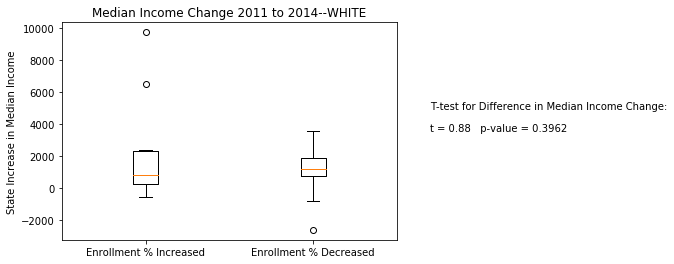

In [7]:
WHITE_increase_2011_2014 = data_df.loc[data_df["WHITE_change_11_14"] > 0, :]["Difference in White Median Income (2011-2014)"]
WHITE_increase_2014_2018 = data_df.loc[data_df["WHITE_change_14_18"] > 0, :]["Difference in White Median Income (2014-2018)"]

WHITE_decrease_2011_2014 = data_df.loc[data_df["WHITE_change_11_14"] <= 0, :]["Difference in White Median Income (2011-2014)"]
WHITE_decrease_2014_2018 = data_df.loc[data_df["WHITE_change_14_18"] <= 0, :]["Difference in White Median Income (2014-2018)"]

income_change_dict = {"Enrollment % Increased": WHITE_increase_2011_2014.to_list(), "Enrollment % Decreased": WHITE_decrease_2011_2014.to_list()}

fig, ax = plt.subplots()
ax.set_title('Median Income Change 2011 to 2014--WHITE')
ax.set_ylabel('State Increase in Median Income')

ax.boxplot(income_change_dict.values())
ax.set_xticklabels(income_change_dict.keys())

test = stats.ttest_ind(WHITE_increase_2011_2014, WHITE_decrease_2011_2014, equal_var=False)


ax.annotate("T-test for Difference in Median Income Change:",xy=(1.1, 0.6) , xycoords='axes fraction' , xytext=(1.1, 0.6)) 
ax.annotate(f"t = {test.statistic.round(2)}   p-value = {test.pvalue.round(4)}", xy=(1.1, 0.5) , xycoords='axes fraction' , xytext=(1.1, 0.5))# , arrowprops= )




plt.savefig("../visualize/white_11_14.png", bbox_inches="tight")

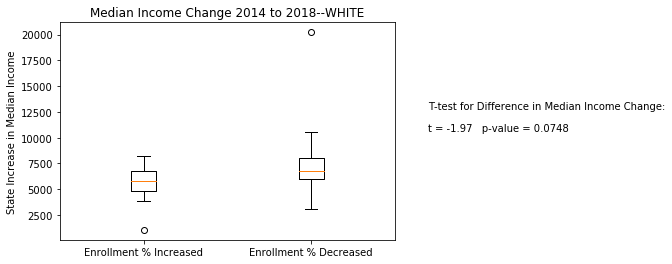

In [8]:
income_change_dict = {"Enrollment % Increased": WHITE_increase_2014_2018.to_list(), "Enrollment % Decreased": WHITE_decrease_2014_2018.to_list()}

fig, ax = plt.subplots()
ax.set_title('Median Income Change 2014 to 2018--WHITE')
ax.set_ylabel('State Increase in Median Income')

ax.boxplot(income_change_dict.values())
ax.set_xticklabels(income_change_dict.keys())

test = stats.ttest_ind(WHITE_increase_2014_2018, WHITE_decrease_2014_2018, equal_var=False)
ax.annotate("T-test for Difference in Median Income Change:",xy=(1.1, 0.6) , xycoords='axes fraction' , xytext=(1.1, 0.6)) 
ax.annotate(f"t = {test.statistic.round(2)}   p-value = {test.pvalue.round(4)}", xy=(1.1, 0.5) , xycoords='axes fraction' , xytext=(1.1, 0.5))# , arrowprops= )

plt.savefig("../visualize/white_14_18.png", bbox_inches="tight")


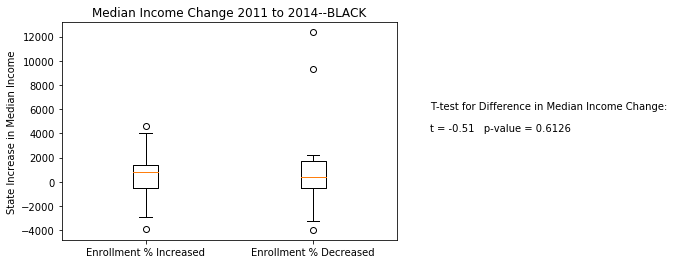

In [9]:
BLACK_increase_2011_2014 = data_df.loc[data_df["BLACK_change_11_14"] > 0, :]["Difference in Black Median Income (2011-2014)"]
BLACK_increase_2014_2018 = data_df.loc[data_df["BLACK_change_14_18"] > 0, :]["Difference in Black Median Income (2014-2018)"]

BLACK_decrease_2011_2014 = data_df.loc[data_df["BLACK_change_11_14"] <= 0, :]["Difference in Black Median Income (2011-2014)"]
BLACK_decrease_2014_2018 = data_df.loc[data_df["BLACK_change_14_18"] <= 0, :]["Difference in Black Median Income (2014-2018)"]

income_change_dict = {"Enrollment % Increased": BLACK_increase_2011_2014.to_list(), "Enrollment % Decreased": BLACK_decrease_2011_2014.to_list()}

fig, ax = plt.subplots()
ax.set_title('Median Income Change 2011 to 2014--BLACK')
ax.set_ylabel('State Increase in Median Income')

ax.boxplot(income_change_dict.values())
ax.set_xticklabels(income_change_dict.keys())

test = stats.ttest_ind(BLACK_increase_2011_2014, BLACK_decrease_2011_2014, equal_var=False)
ax.annotate("T-test for Difference in Median Income Change:",xy=(1.1, 0.6) , xycoords='axes fraction' , xytext=(1.1, 0.6)) 
ax.annotate(f"t = {test.statistic.round(2)}   p-value = {test.pvalue.round(4)}", xy=(1.1, 0.5) , xycoords='axes fraction' , xytext=(1.1, 0.5))# , arrowprops= )


plt.savefig("../visualize/black_11_14.png", bbox_inches="tight")


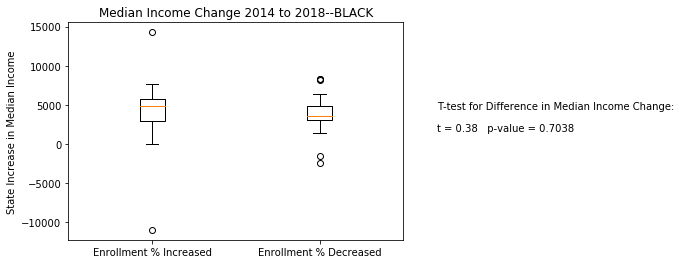

In [10]:
income_change_dict = {"Enrollment % Increased": BLACK_increase_2014_2018.to_list(), "Enrollment % Decreased": BLACK_decrease_2014_2018.to_list()}

fig, ax = plt.subplots()
ax.set_title('Median Income Change 2014 to 2018--BLACK')
ax.set_ylabel('State Increase in Median Income')

ax.boxplot(income_change_dict.values())
ax.set_xticklabels(income_change_dict.keys())

test = stats.ttest_ind(BLACK_increase_2014_2018, BLACK_decrease_2014_2018, equal_var=False)
ax.annotate("T-test for Difference in Median Income Change:",xy=(1.1, 0.6) , xycoords='axes fraction' , xytext=(1.1, 0.6)) 
ax.annotate(f"t = {test.statistic.round(2)}   p-value = {test.pvalue.round(4)}", xy=(1.1, 0.5) , xycoords='axes fraction' , xytext=(1.1, 0.5))# , arrowprops= )


plt.savefig("../visualize/black_14_18.png", bbox_inches="tight")


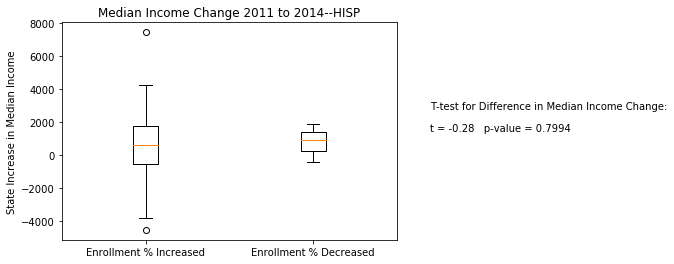

In [11]:
HISP_increase_2011_2014 = data_df.loc[data_df["HISP_change_11_14"] > 0, :]["Difference in Hispanic or Latino Median Income (2011-2014)"]
HISP_increase_2014_2018 = data_df.loc[data_df["HISP_change_14_18"] > 0, :]["Difference in Hispanic or Latino Median Income (2014-2018)"]

HISP_decrease_2011_2014 = data_df.loc[data_df["HISP_change_11_14"] <= 0, :]["Difference in Hispanic or Latino Median Income (2011-2014)"]
HISP_decrease_2014_2018 = data_df.loc[data_df["HISP_change_14_18"] <= 0, :]["Difference in Hispanic or Latino Median Income (2014-2018)"]

income_change_dict = {"Enrollment % Increased": HISP_increase_2011_2014.to_list(), "Enrollment % Decreased": HISP_decrease_2011_2014.to_list()}

fig, ax = plt.subplots()
ax.set_title('Median Income Change 2011 to 2014--HISP')
ax.set_ylabel('State Increase in Median Income')

test = stats.ttest_ind(HISP_increase_2011_2014, HISP_decrease_2011_2014, equal_var=False)
ax.annotate("T-test for Difference in Median Income Change:",xy=(1.1, 0.6) , xycoords='axes fraction' , xytext=(1.1, 0.6)) 
ax.annotate(f"t = {test.statistic.round(2)}   p-value = {test.pvalue.round(4)}", xy=(1.1, 0.5) , xycoords='axes fraction' , xytext=(1.1, 0.5))# , arrowprops= )


ax.boxplot(income_change_dict.values())
ax.set_xticklabels(income_change_dict.keys())

plt.savefig("../visualize/hisp_11_14.png", bbox_inches="tight")


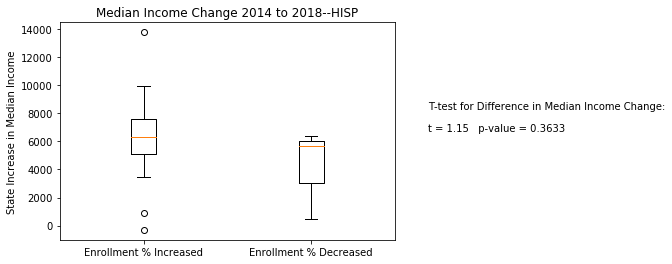

In [12]:
income_change_dict = {"Enrollment % Increased": HISP_increase_2014_2018.to_list(), "Enrollment % Decreased": HISP_decrease_2014_2018.to_list()}

fig, ax = plt.subplots()
ax.set_title('Median Income Change 2014 to 2018--HISP')
ax.set_ylabel('State Increase in Median Income')

ax.boxplot(income_change_dict.values())
ax.set_xticklabels(income_change_dict.keys())

test = stats.ttest_ind(HISP_increase_2014_2018, HISP_decrease_2014_2018, equal_var=False)
ax.annotate("T-test for Difference in Median Income Change:",xy=(1.1, 0.6) , xycoords='axes fraction' , xytext=(1.1, 0.6)) 
ax.annotate(f"t = {test.statistic.round(2)}   p-value = {test.pvalue.round(4)}", xy=(1.1, 0.5) , xycoords='axes fraction' , xytext=(1.1, 0.5))# , arrowprops= )


plt.savefig("../visualize/hisp_14_18.png", bbox_inches="tight")



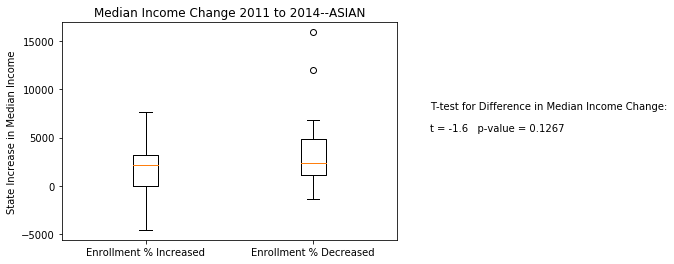

In [13]:
ASIAN_increase_2011_2014 = data_df.loc[data_df["ASIAN_change_11_14"] > 0, :]["Difference in Asian Median Income (2011-2014)"]
ASIAN_increase_2014_2018 = data_df.loc[data_df["ASIAN_change_14_18"] > 0, :]["Difference in Asian Median Income (2014-2018)"]

ASIAN_decrease_2011_2014 = data_df.loc[data_df["ASIAN_change_11_14"] <= 0, :]["Difference in Asian Median Income (2011-2014)"]
ASIAN_decrease_2014_2018 = data_df.loc[data_df["ASIAN_change_14_18"] <= 0, :]["Difference in Asian Median Income (2014-2018)"]

income_change_dict = {"Enrollment % Increased": ASIAN_increase_2011_2014.to_list(), "Enrollment % Decreased": ASIAN_decrease_2011_2014.to_list()}

fig, ax = plt.subplots()
ax.set_title('Median Income Change 2011 to 2014--ASIAN')
ax.set_ylabel('State Increase in Median Income')

test = stats.ttest_ind(ASIAN_increase_2011_2014, ASIAN_decrease_2011_2014, equal_var=False)
ax.annotate("T-test for Difference in Median Income Change:",xy=(1.1, 0.6) , xycoords='axes fraction' , xytext=(1.1, 0.6)) 
ax.annotate(f"t = {test.statistic.round(2)}   p-value = {test.pvalue.round(4)}", xy=(1.1, 0.5) , xycoords='axes fraction' , xytext=(1.1, 0.5))# , arrowprops= )


ax.boxplot(income_change_dict.values())
ax.set_xticklabels(income_change_dict.keys())

plt.savefig("../visualize/asian_11_14.png", bbox_inches="tight")



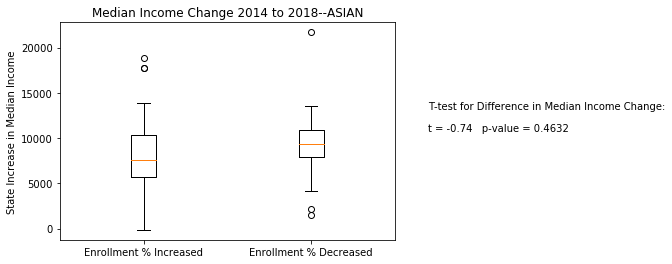

In [14]:
income_change_dict = {"Enrollment % Increased": ASIAN_increase_2014_2018.to_list(), "Enrollment % Decreased": ASIAN_decrease_2014_2018.to_list()}

fig, ax = plt.subplots()
ax.set_title('Median Income Change 2014 to 2018--ASIAN')
ax.set_ylabel('State Increase in Median Income')

ax.boxplot(income_change_dict.values())
ax.set_xticklabels(income_change_dict.keys())

test = stats.ttest_ind(ASIAN_increase_2014_2018, ASIAN_decrease_2014_2018, equal_var=False)
ax.annotate("T-test for Difference in Median Income Change:",xy=(1.1, 0.6) , xycoords='axes fraction' , xytext=(1.1, 0.6)) 
ax.annotate(f"t = {test.statistic.round(2)}   p-value = {test.pvalue.round(4)}", xy=(1.1, 0.5) , xycoords='axes fraction' , xytext=(1.1, 0.5))# , arrowprops= )


plt.savefig("../visualize/asian_14_18.png", bbox_inches="tight")

